## Mental health in tech: Gender differences

Data set from OSMI Mental Health in Tech Survey 2016. Accessed through https://www.kaggle.com/osmi/mental-health-in-tech-2016

Currently over 1400 responses, the ongoing 2016 survey aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


df = pd.read_csv('survey_2016.csv')
#like to look at all the data
pd.set_option('display.max_columns', 500)

df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [3]:
print(df.columns.values)

['Are you self-employed?'
 'How many employees does your company or organization have?'
 'Is your employer primarily a tech company/organization?'
 'Is your primary role within your company related to tech/IT?'
 'Does your employer provide mental health benefits as part of healthcare coverage?'
 'Do you know the options for mental health care available under your employer-provided coverage?'
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?'
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'
 'Do you think that discussing a mental health disorder with your employer would have negative cons

In [4]:
# rename columns to make them easier to use

column_names = {'Are you self-employed?' : 'self_employed', 
                'How many employees does your company or organization have?':'no_employees',
               'Is your employer primarily a tech company/organization?': 'tech_company',
               'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'mental_health_consequence',
               'Do you think that discussing a physical health issue with previous employers would have negative consequences?':'phys_health_consequence',
               'Would you feel comfortable discussing a mental health disorder with your coworkers?':'coworkers',
               'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?':'supervisors',
               'Do you feel that your employer takes mental health as seriously as physical health?': 'mental_vs_physical',
               'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?':'obs_consequence',
               'What is your age?':'Age',
               'What is your gender?':'Gender',
               'What country do you live in?':'Country',
               'What US state or territory do you live in?':'State',
               'Do you have a family history of mental illness?':'family_history',
               'Have you had a mental health disorder in the past?':'past_disorder',
               'Do you currently have a mental health disorder?':'current_disorder',
               'If yes, what condition(s) have you been diagnosed with?':'condition_diagnosed',
               'If maybe, what condition(s) do you believe you have?':'condition_believed',
               'Have you ever sought treatment for a mental health issue from a mental health professional?':'treatment'}


df.rename(columns = column_names, inplace=True)

In [5]:
#next, clean up gender column

df.Gender.unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [6]:
# wow, lots of different values.

male = ['Male', 'male', 'Male ','m','man','Cis male','Male.','Male (cis)', 'Man', 'Sex is male', 'cis male', 'Malr','Dude','mail','M|','male ','Cis Male','cisdude','cis man','MALE']
female = ['Female','female','I identify as female.','female ','F','Woman','f','Cis female ','Transitioned, M2F', 'Female or Multi-Gender Femme','Female ','woman','female/woman','Cisgender Female','genderqueer woman','fem', ' Female','Cis-woman','female-bodied','Transgender woman']

def norm_gender(gender):
    if gender in male:
        return "Male"
    elif gender in female:
        return "Female"
    else:
        return None
    
df['Gender'] = df.Gender.apply(norm_gender)    
df.Gender.unique()

array(['Male', 'Female', None], dtype=object)

In [7]:
# drop all rows with None value for gender
df_mf = df.dropna(subset=['Gender'])


In [8]:
#take a look at proportion of respondents who identify as currently have a (any) mental disorder, broken down by gender

df_mf.groupby('Gender').current_disorder.value_counts(normalize=True,sort=False)

Gender  current_disorder
Female  Maybe               0.165192
        No                  0.292035
        Yes                 0.542773
Male    Maybe               0.253608
        No                  0.397938
        Yes                 0.348454
Name: current_disorder, dtype: float64

Very obvious gender differences. Over **50% of women** say they currently have a mental disorder compared to only **35% of men**. However, more men were unsure and selected "maybe", so it's possible that part of the difference is due to reporting/seeking of treatment etc. Still, even when counting "maybe" as yes, we would still see a gender difference.

In [9]:
#look at proportion of respondents who have ever sought treatment for mental health disorder, broken down by gender
df_mf.groupby('Gender').treatment.value_counts(normalize=True,sort=False)

Gender  treatment
Female  0            0.247788
        1            0.752212
Male    0            0.471134
        1            0.528866
Name: treatment, dtype: float64

Important to keep in mind that "treatment" asks for have you **ever** sought treatment. So that explains why numbers are higher. These numbers could also include treatment as children or anything else that is totally unrelated to **currently** working in tech. Current disorder is more interesting/relevant in this case.

## Visualizing Gender Differences

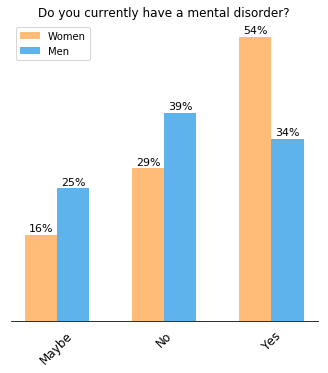

In [10]:
to_plot = pd.DataFrame(df_mf.groupby('Gender').current_disorder.value_counts(normalize=True,sort=False))
women = to_plot.current_disorder[0:3]
men = to_plot.current_disorder[3:6]

cb_orange = (255/255, 188/255, 121/255)
cb_blue = (95/255, 158/225, 209/225)

fig, ax = plt.subplots(figsize=(5.5,5.5))
answers = ['Maybe','No','Yes']
pos = np.arange(len(answers))
pos_m = [x+0.3 for x in pos]
pos_ticks = [x+0.15 for x in pos]

women_bars = plt.bar(pos,women,color=cb_orange,label='Women', width=0.3,align='center')
men_bars = plt.bar(pos_m,men,color=cb_blue,label='Men',width=0.3,align='center')


plt.xticks(pos_ticks,answers,rotation=45,fontsize=12)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.legend()
plt.title('Do you currently have a mental disorder?',fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#commented out is a way to display y axis values in percent on the y axis itself
#def percent(x, pos):
    #'The two args are the value and tick position'
    # return '{:1.0f}%'.format(x*100)
#funcformatter to display y axis values as % rather than fractions
#formatter = FuncFormatter(percent)
#ax.yaxis.set_major_formatter(formatter)

for bar in women_bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.006, str(int(bar.get_height()*100)) + '%', 
                 ha='center', color='black', fontsize=11)
    
for bar in men_bars:
    plt.gca().text(bar.get_x()+ bar.get_width()/2, bar.get_height()+0.006, str(int(bar.get_height()*100)) + '%', 
                 ha='center', color='black', fontsize=11)    

## Chi-squared test for independence

In [11]:
#perform chi-square for independence to check for statistical significance using scipy
import scipy.stats as stats 
import numpy as np

tab = pd.crosstab(df_mf.current_disorder, df_mf.Gender, margins=True)
tab

Gender,Female,Male,All
current_disorder,,,
Maybe,56,246,302
No,99,386,485
Yes,184,338,522
All,339,970,1309


In [12]:
observed = tab.iloc[0:3,0:2]
stats.chi2_contingency(observed=observed)

(39.902639658070377,
 2.1639732681151091e-09,
 2,
 array([[  78.21084798,  223.78915202],
        [ 125.60351413,  359.39648587],
        [ 135.18563789,  386.81436211]]))

Chi square test supports what is clearly visible in the graph. There is a clear relationship between gender and current mental health disorder. 

## Types of mental disorders

In [13]:
df_mf.condition_believed.unique()

array([nan, 'Substance Use Disorder|Addictive Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)',
       'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder',
       'Mood Disorder (Depression, Bipolar Disorder, etc)|Anxiety Disorder (Generalized, Social, Phobia, etc)',
       'Mood Disorder (Depression, Bipolar Disorder, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Substance Use Disorder|Addictive Disorder',


In [14]:
df_mf.condition_diagnosed.unique()

array([nan,
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Stress Response Syndromes',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Stress Response Syndromes|Substance Use Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Substance Use Disorder',
       'Mood Disorder (Depression, Bipolar Disorder, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Obsessive-Compulsive Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Eating Disorder (Anorexia, Bulimia, etc)|Obsessive-Compulsive Disorder',
       'Personality Disorder (Borderline, Antisocial, Paranoid, etc)|Attention Deficit Hyperactivity Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depressi

Looks like people got to choose from several options. I will make new columns for each disorder and code 1-0. Can split strings on |

In [15]:
import warnings
warnings.filterwarnings('ignore')

df_mf['anxiety_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Anxiety Disorder (Generalized, Social, Phobia, etc)' in str(x).split('|') else 0)
df_mf['mood_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Mood Disorder (Depression, Bipolar Disorder, etc)' in str(x).split('|') else 0)
df_mf['stress_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Stress Response Syndromes' in str(x).split('|') else 0)
df_mf['substance_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Substance Use Disorder' in str(x).split('|') else 0)
df_mf['OCD_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Obsessive-Compulsive Disorder' in str(x).split('|') else 0)
df_mf['personality_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)' in str(x).split('|') else 0)
df_mf['ADHD_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Attention Deficit Hyperactivity Disorder' in str(x).split('|') else 0)
df_mf['addictive_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Addictive Disorder' in str(x).split('|') else 0)
df_mf['PTSD_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Post-traumatic Stress Disorder' in str(x).split('|') else 0)
df_mf['psychotic_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)' in str(x).split('|') else 0)
df_mf['eating_diagnosed'] = df_mf.condition_diagnosed.apply(lambda x: 1 if 'Eating Disorder (Anorexia, Bulimia, etc)' in str(x).split('|') else 0)



In [16]:
table = pd.pivot_table(df_mf, index='Gender', values=['anxiety_diagnosed','mood_diagnosed','OCD_diagnosed','ADHD_diagnosed','substance_diagnosed','PTSD_diagnosed','psychotic_diagnosed','personality_diagnosed','addictive_diagnosed','eating_diagnosed'], aggfunc=np.mean)*100
table

,ADHD_diagnosed,OCD_diagnosed,PTSD_diagnosed,addictive_diagnosed,anxiety_diagnosed,eating_diagnosed,mood_diagnosed,personality_diagnosed,psychotic_diagnosed,substance_diagnosed
Gender,,,,,,,,,,
Female,11.799410,3.834808,8.554572,2.654867,34.513274,5.014749,43.952802,2.359882,0.000000,2.949853
Male,7.216495,2.886598,3.298969,2.371134,19.896907,1.030928,23.195876,2.371134,0.618557,2.680412


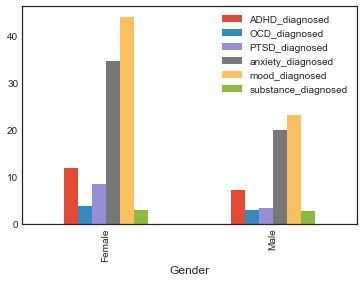

In [17]:
plt.style.use(['ggplot','seaborn-white'])
table_select = pd.pivot_table(df_mf, index='Gender', values=['anxiety_diagnosed','mood_diagnosed','OCD_diagnosed','ADHD_diagnosed','substance_diagnosed','PTSD_diagnosed'], aggfunc=np.mean)*100
table_select.plot(kind='bar')
plt.show()

The graph shows that women have a very high prevalence of mood and anxiety disorders and this seems to be the basis of the gender difference in overall mental health. This finding is not surprising, given that women in the general population are more likely to develop stress related disorders such as mood disorder, anxiety disorders and PTSD (almost twice as likely in some studies. So it looks like the gender difference in this sample of people working in tech goes along with trends seen in the general US population

It is more concerning that the prevalence of anxiety and mood disorders is high in both genders in this sample. The 12 month prevalence for US adults for anxiety and mood disorders is 18% and 10% respectively (https://www.nimh.nih.gov/health/statistics/prevalence/index.shtml).
